# Карты самоорганизации (Self Orginized Map, SOM).



# Оглавление <a name='toc'></a>

<ul>
    <li><a href='#article'>Выходные данные статьи</a></li>       
    <li><a href='#algorythm'>Алгоритм решения, использованного в статье</a></li>        
    <li><a href='#implementation'>Имплементация</a></li>        
    <li><a href='#ideas'>Идеи по применению и дальнейшему развитию</a></li>
    <li><a href='#links'>Полезные ссылки</a></li>    
</ul>

# Выходные данные статьи <a name='article'></a>

T. Kohonnen (Finnland) The Self-Organizing Maps. 1990. https://sci2s.ugr.es/keel/pdf/algorithm/articulo/1990-Kohonen-PIEEE.pdf

Метод кластеризации, без учителя.

# Алгоритм решения, использованного в статье <a name='algorythm'></a>

Описан универсальный алгоритм кластеризации объектов с использованием нейронных сетей методом «обучения без учителя».

Нейронная сеть состоит из нейронов, расположенных в одномерном или двумерном массиве, количество весов нейронов равно размерности векторов входных данных. Слоев нейронов может быть два – один (входной) для приема входных данных, другой (исходящий для визуализации полученных результатов).

Алгоритм состоит из нескольких шагов:
1.	Инициализация весов нейронов (случайными значениями, либо значениями случайно выбранного входного вектора)
2.	Выбор входного вектора, поиск ближайшего к нему нейрона, определение границы нейрона-победителя, выравнивание (приближение к входному вектору) весов нейрона победителя и ближайших к нему нейронов (чем дальше от победителя, тем меньше добавка, граница соседей уменьшается с увеличением итераций, скорость уменьшения является гиперпараметром)
3.	Многократное повторение процедуры для всех весов.

В результате получается карта признаков – каждый нейрон находится в одном из кластеров. Найдя для любого входного вектора ближайший к нему нейрон можно сопоставить этот входной вектор с кластером нейрона.
Алгоритм хорош для визуализации многомерных процессов.


# Имплементация <a name='implementation'></a>

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import copy

from matplotlib.animation import FuncAnimation, ArtistAnimation

#### Описание функций

In [6]:
def calc_distance_between_neurons(x1, y1, x2, y2):
    return np.max([np.abs(x1-x2), np.abs(y1-y2)])

def calc_neighbours_coeff(d, sigma):
    return np.exp(-d**2/2/sigma**2)

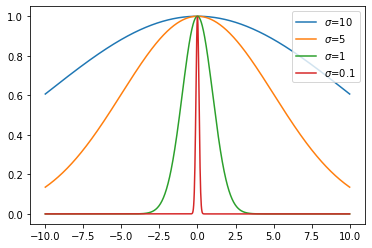

In [7]:
xs = np.linspace(-10,10,1000)
plt.plot(xs, [calc_neighbours_coeff(x, 10) for x in xs], label="$\sigma$=10")
plt.plot(xs, [calc_neighbours_coeff(x, 5) for x in xs], label="$\sigma$=5")
plt.plot(xs, [calc_neighbours_coeff(x, 1) for x in xs], label="$\sigma$=1")
plt.plot(xs, [calc_neighbours_coeff(x, 0.1) for x in xs], label="$\sigma$=0.1")
plt.legend(loc='upper right')
plt.show()

#### Алгоритм расчета

In [162]:
# эвристики для начальных значений параметров из статьи https://habr.com/ru/post/334810/

dim = 100
channels = 3

sigma0 = dim // 10
tau1 = 10000 / np.log(sigma0)

eta0 = 1
tau2 = 10000

weights = np.random.random(size=(dim, dim, channels))
colors = np.random.random(size=(1000, channels))

epochs = 200
step = 0

verbose = 0
    

!NB Оценивать сумму расстояний между элементами вектора и ближайшими нейронами.

In [168]:
for step in range(epochs):

    for color in colors:
        
        # определяем индекс нейрона-победителя
        distances = np.array([[euclidean(weights[n1, n2, :], color) for n1 in range(dim)] for n2 in range(dim)])
        n, m = np.unravel_index(np.argmin(distances), (dim, dim))
           
        # обновить веса всех нейронов, с учетом удаленности от нейрона-победителя
        for d1 in range(dim):
            for d2 in range(dim):
                for chnl in range(channels):
                    dist = calc_distance_between_neurons(n, m, d1, d2)
                    sigma = sigma0 * np.exp(-step**2 / tau1)
                    eta = eta0 * np.exp(-step**2 / tau2)
                    weights[d1, d2, chnl] += eta*calc_neighbours_coeff(dist, sigma)*(color[chnl] - weights[d1, d2, chnl])

    # запись в лог и сохранение текущих весов карты
    fd = open('som_data_{}.pickle'.format(step), 'wb')
    pickle.dump(weights, fd)
    fd.close()
    if verbose:
        print("step: {}, eta: {}, sigma: {}".format(step, eta, sigma))
            

KeyboardInterrupt: 

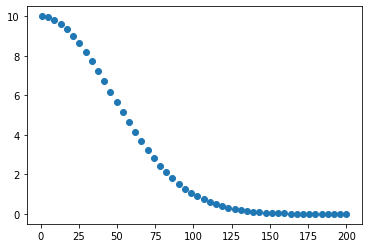

In [165]:
xs = np.linspace(1, 200)
plt.scatter(xs, sigma0*np.exp(-xs**2 / tau1))
plt.show()

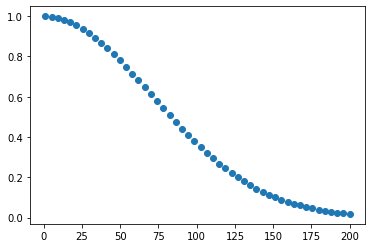

In [166]:
xs = np.linspace(1, 200)
plt.scatter(xs, eta0*np.exp(-xs**2 / tau2))
plt.show()

In [128]:
#!rm ./*.pickle
!ls

 CNN.ipynb
'Domukhovsky, Sinadsky-Iterative Statistical-Entropy Method for Zero Knowledge Network Traffic Analysis Algorithm Implementation (artcl impl).ipynb'
 Graphics.ipynb
 Morfessor.ipynb
'NLP Basics-Smurov(Abbyy).ipynb'
 som_data_0_0.pickle.old
 som_data_0_1000.pickle.old
 SOM.ipynb
 som.py
 Untitled.ipynb
 work_with_pcap.ipynb


In [157]:
fd = open('som_data_1.pickle', 'rb')
weights_start = pickle.load(fd)
fd.close()

fd = open('som_data_80.pickle', 'rb')
weights_mid1 = pickle.load(fd)
fd.close()

fd = open('som_data_90.pickle', 'rb')
weights_mid2 = pickle.load(fd)
fd.close()

fd = open('som_data_100.pickle', 'rb')
weights_mid3 = pickle.load(fd)
fd.close()

fd = open('som_data_50000.pickle', 'rb')
weights_end = pickle.load(fd)
fd.close()

FileNotFoundError: [Errno 2] No such file or directory: 'som_data_50000.pickle'

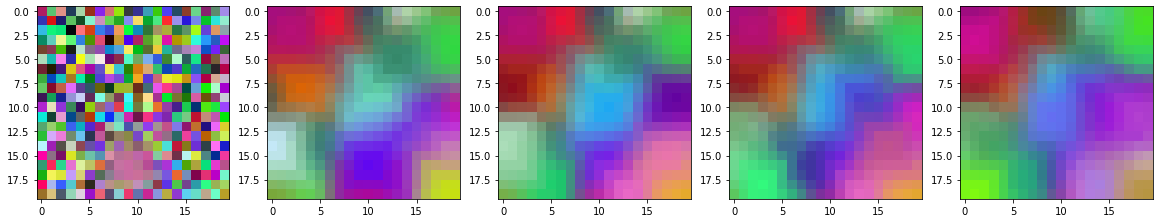

In [155]:
plt.figure(figsize=(20,9))
plt.subplot(151)
plt.imshow(weights_start)

plt.subplot(152)
plt.imshow(weights_mid1)

plt.subplot(153)
plt.imshow(weights_mid2)

plt.subplot(154)
plt.imshow(weights_mid3)

plt.subplot(155)
plt.imshow(weights_end)

plt.show()

# Создание анимации

In [ ]:
imageList = [] 
for i in range(1, 5000): 
    fd = open('som_data_{}.pickle'.format(i), 'rb')
    w = pickle.load(fd)
    fd.close()        
    imageList.append(w)
    
def getImageFromList(x): 
    return (imageList[x])
 
fig = plt.figure (figsize = (10, 10)) 
ims = [] 
for i in range(len(imageList)): 
    im = plt.imshow(getImageFromList(i), animated=True) 
    ims.append ([im]) 
    
ani = ArtistAnimation(fig, ims , interval = 59, blit = True, repeat_delay = 1000) 
plt.close() 

In [ ]:
ani.save('data.gif')

# Кластерный анализ датасета load_digits() <a name='digits'></a>

# Полезные ссылки <a name='links'></a>

- Оригинальная статья Кохоннена (1990 год) https://sci2s.ugr.es/keel/pdf/algorithm/articulo/1990-Kohonen-PIEEE.pdf
- Описание создания сети Кохоннена в Tensorflow https://habr.com/ru/post/334810/
- Самоорганизующаяся карта (статья wikipedia) https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D0%BC%D0%BE%D0%BE%D1%80%D0%B3%D0%B0%D0%BD%D0%B8%D0%B7%D1%83%D1%8E%D1%89%D0%B0%D1%8F%D1%81%D1%8F_%D0%BA%D0%B0%D1%80%D1%82%D0%B0_%D0%9A%D0%BE%D1%85%D0%BE%D0%BD%D0%B5%D0%BD%D0%B0